# Assignment No. 02 

# Problem Statement

Implementing Feed forward Neural Network with keras and tensorflow.
1.	Import the necessary packages
2.	Load the training and testing data(MNIST)
3.	Define the network architecture using keras
4.	Train the model using SGD
5.	Evaluate the network
6.	Plot the training loss and accuracy

# Solution Expected

Implement and train a feed-forward neural network (also known as an "MLP" for "multi-layer perceptron") on a dataset called MNIST  and improve model generalisation by achieving increased accuracy and descresesd loss where model gains good confidence with the prediction.

# Objectives to be achieved

1.	Understand how to use Tensorflow Eager and Keras Layers to build a neural network architecture.
2.	Understand how a model is trained and evaluated.
3.	Identify digits from images. 
4.	Our main goal is to train a neural network (using Keras) to obtain > 90% accuracy on MNIST dataset.
5.	Research at least 1 technique that can be used to improve model generalization.

# Methodology to be used

⮚	Deep Learning
⮚	Feed Forward Neural Network

# Justification with Theory/Literature

## Deep Learning
Deep learning attempts to mimic the human brain—albeit far from matching its ability—enabling systems to cluster data and make predictions with incredible accuracy.

Deep learning is a subset of machine learning, which is essentially a neural network with three or more layers. These neural networks attempt to simulate the behavior of the human brain—albeit far from matching its ability—allowing it to “learn” from large amounts of data. While a neural network with a single layer can still make approximate predictions, additional hidden layers can help to optimize and refine for accuracy.

Deep learning drives many artificial intelligence (AI) applications and services that improve automation, performing analytical and physical tasks without human intervention. Deep learning technology lies behind everyday products and services (such as digital assistants, voice-enabled TV remotes, and credit card fraud detection) as well as emerging technologies (such as self-driving cars). [1]

## Feed Forward Neural Network
A Feed Forward Neural Network is an artificial neural network in which the connections between nodes does not form a cycle. The opposite of a feed forward neural network is a recurrent neural network, in which certain pathways are cycled. The feed forward model is the simplest form of neural network as information is only processed in one direction. While the data may pass through multiple hidden nodes, it always moves in one direction and never backwards. [2]
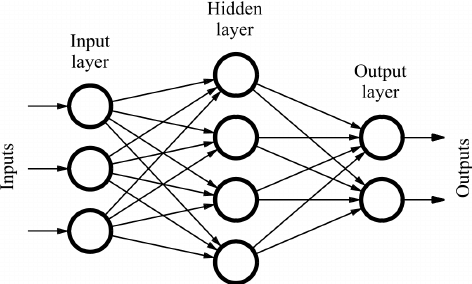
[3]

## Keras
Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research.

Keras is:

Simple -- but not simplistic. Keras reduces developer cognitive load to free you to focus on the parts of the problem that really matter.
Flexible -- Keras adopts the principle of progressive disclosure of complexity: simple workflows should be quick and easy, while arbitrarily advanced workflows should be possible via a clear path that builds upon what you've already learned.
Powerful -- Keras provides industry-strength performance and scalability: it is used by organizations and companies including NASA, YouTube, or Waymo. [4]

## TensorFlow 2
TensorFlow 2 is an end-to-end, open-source machine learning platform. You can think of it as an infrastructure layer for differentiable programming. It combines four key abilities:

Efficiently executing low-level tensor operations on CPU, GPU, or TPU.
Computing the gradient of arbitrary differentiable expressions.
Scaling computation to many devices, such as clusters of hundreds of GPUs.
Exporting programs ("graphs") to external runtimes such as servers, browsers, mobile and embedded devices. [4]

## Stochastic Gradient Descent (SGD)
The word ‘stochastic‘ means a system or process linked with a random probability. Hence, in Stochastic Gradient Descent, a few samples are selected randomly instead of the whole data set for each iteration. In Gradient Descent, there is a term called “batch” which denotes the total number of samples from a dataset that is used for calculating the gradient for each iteration. In typical Gradient Descent optimization, like Batch Gradient Descent, the batch is taken to be the whole dataset. Although using the whole dataset is really useful for getting to the minima in a less noisy and less random manner, the problem arises when our dataset gets big. [5]

# Code & Output

In [ ]:
## Importing Packages
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
import tensorflow.keras.layers as KL
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [ ]:
## Dataset
df = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = df.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

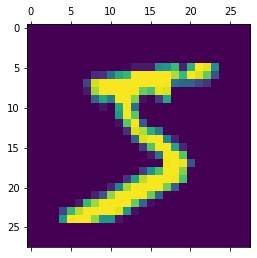

In [ ]:
#to see the first image
plt.matshow(x_train[0])

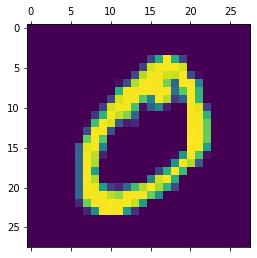

In [ ]:
#to see the second image
plt.matshow(x_train[1])

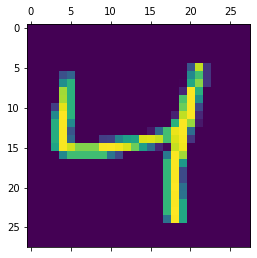

In [ ]:
#to see the Third image
plt.matshow(x_train[2])

In [ ]:
## Model
inputs = KL.Input(shape=(28, 28))                      #(?, 28, 28)
l = KL.Flatten()(inputs)                               #(?, 784)
l = KL.Dense(512, activation=tf.nn.relu)(l)            #(?, 512)
outputs = KL.Dense(10, activation=tf.nn.softmax)(l)    #(?, 10) -> (?, 1)

In [ ]:
model = tf.keras.models.Model(inputs, outputs)
model.summary()
model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {0} - Test Acc: {1}".format(test_loss, test_acc))

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2000 - accuracy: 0.9403
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0812 

In [ ]:
test_predict = model.predict(x_test)

test_predict_labels = np.argmax(test_predict, axis=1)
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=test_predict_labels)
print('Confusion matrix of the test set:\n', confusion_matrix)

Confusion matrix of the test set:
 tf.Tensor(
[[ 972    1    1    1    0    1    1    1    1    1]
 [   0 1124    3    1    0    2    1    1    3    0]
 [   3    1 1012    5    0    0    1    4    5    1]
 [   0    0    1 1001    0    3    0    4    1    0]
 [   1    0    4    0  953    1    2    3    0   18]
 [   2    0    0   16    0  866    2    1    3    2]
 [   4    2    2    1    3    3  940    0    3    0]
 [   2    3   10    1    0    0    0 1002    2    8]
 [   2    0    2    6    3    2    0    2  952    5]
 [   3    3    0    5    4    4    0    7    0  983]], shape=(10, 10), dtype=int32)


# Conclusion

## Thus we have succesfully implemented Feed forward Neural Network with keras and tensorflow.

# References 

1. https://www.ibm.com/cloud/learn/deep-learning
2. https://deepai.org/machine-learning-glossary-and-terms/feed-forward-neural-network
3. https://www.researchgate.net/figure/Sample-of-a-feed-forward-neural-network_fig1_234055177
4. https://keras.io/about/
5. https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/